In [ ]:
import numpy as np
import matplotlib.pylab as plt

In [ ]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1) 

In [ ]:
def numerical_gradient_single_point(f, x, verbose=False): 
    h = 1e-4
    grad = np.zeros_like(x)
    if verbose:
        print('x.size={}'.format(x.size)) 
       
    for idx in range(x.size): 
        v_keep = x[idx]
        
        
        x[idx] = float(v_keep) + h 
        fxh1 = f(x)
        if verbose:
            print(x, '-->', fxh1)
        
        
        x[idx] = float(v_keep) - h 
        fxh2 = f(x)
        if verbose:
            print(x, '-->', fxh2)
        
        grad[idx] = (fxh1 - fxh2) / (2*h) 
        x[idx] = v_keep 
        
        if verbose:
            print('grad[{}]={}'.format(idx, grad[idx]))
            print()
    return grad

In [ ]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_single_point(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_single_point(f, x)
        
        return grad

In [ ]:
def gradient_descent(f, init_x, lr =0.1, step_num= 100, return_history = False, verbose = False):
    x = init_x
    vx = np.zeros((step_num+1, 2)) 
    vx[0] = x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        
        x -= lr * grad
        if verbose:
            print(x, grad)
            
        vx[i+1] = x 
    
    if return_history:
        
        return x, vx
    else:
        return x

In [ ]:
init_x = np.array([-3.0, 4.0])

In [ ]:
#x_final = gradient_descent(function_2, init_x = init_x, lr = 0.1)

In [15]:
learning_rate = 0.0001

In [17]:
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, return_history = True, verbose=False)

최종값이 아래에 수렴함을 확인

In [16]:
x_final

array([-6.11110793e-10,  8.14814391e-10])

Text(0.5, 1.0, 'Learning rate = 0.0001')

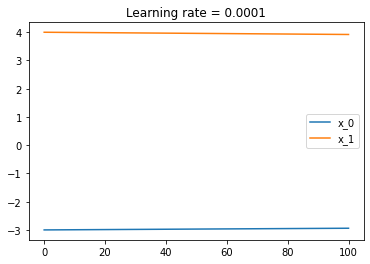

In [18]:
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0', 'x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

**생각해보기**

In [ ]:
init_x

array([-3.,  4.])

**Homework**

* TODO I: lr = 10.0 으로, lr = 0.0001 등으로 변경하여 결과를 뽑아보고 논의해봅시다.

* TODO II: 3차원 공간에서의 좌표 궤적을 그려주세요 (lr = 0.001, 0.01, 0.1, 1.0, 10.0 등등)

